**Name:** Omitted 

**Studednt ID:** Omitted

### 1. Association rules analysis, 12 points

You have to perform market basket analysis using the
data from ’grocery assignment.csv’. The columns of interest in this case are ’transaction id’ and
’itemDescription’, and the data is in the format we have encountered before: we have several
rows for each transaction, one row for each item that is part of the transaction. Transform
the data into transactional format, extract frequent item-sets and create association rules as it
was done in the course material. 

(Note: you may have to use much smaller threshold values
for support and confidence than in the lectures; experiment with different values until you get
a reasonable amount of item-sets and rules). 

Do the extracted rules seem to contain useful
information or only trivial observations? Specifically, what would you recommend to a person
(i.e. what is the consequent in association rules terminology) when you now that in the basket
there is already (i) sausage, (ii) tropical fruit, (iii) sausage AND tropical fruit?

In [2]:
### Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### The way shown in the lecture video does not work in my PC. Therefore, I installed the 'mlxtend' in the following way-
            ## BTW, I guess, this could be done also from anaconda navigator!

try:
    import mlxtend
except:
    import pip
    pip.main(['install', 'mlxtend'])
    import mlxtend

In [3]:
### And here are other libraries as the mlxtend is now installed

import mlxtend.preprocessing
import mlxtend.frequent_patterns

In [4]:
## Reading the given 'grocery_assignment.csv' file

df_1 = pd.read_csv('grocery_assignment.csv', sep = ',', index_col = 0)
df_1.head(10)

,transaction_id,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1,5000,2015-10-02,soda,2015,10,2,4
1,1,5000,2015-10-02,root vegetables,2015,10,2,4
2,1,5000,2015-10-02,semi-finished bread,2015,10,2,4
3,2,5000,2014-11-16,bottled beer,2014,11,16,6
4,2,5000,2014-11-16,other vegetables,2014,11,16,6
5,3,5000,2014-09-03,fruit/vegetable juice,2014,9,3,2
6,3,5000,2014-09-03,onions,2014,9,3,2
7,4,4999,2015-12-26,bottled water,2015,12,26,5
8,4,4999,2015-12-26,herbs,2015,12,26,5
9,5,4999,2015-05-16,butter milk,2015,5,16,5


In [5]:
## Following we can have a look from multi dimentional agnle to the dataset, 
# such as- numbers of data entries, null values (if any), datatypes.

## At the same time, we will also make sure that 'itemDescription' column contains only 'String' type data-

df_1['itemDescription'] = df_1['itemDescription'].astype('str')

df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38765 entries, 0 to 38764
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   transaction_id   38765 non-null  int64 
 1   Member_number    38765 non-null  int64 
 2   Date             38765 non-null  object
 3   itemDescription  38765 non-null  object
 4   year             38765 non-null  int64 
 5   month            38765 non-null  int64 
 6   day              38765 non-null  int64 
 7   day_of_week      38765 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 2.7+ MB


In [6]:
### Now we will work on only the data which we need and in this case 'transaction_id' and 'itemDescription' columns only.

## We see, the items under the 'itemDescription' column are not in the right format. Therefore, to transform those, we can 
 # apply now 'groupby' function

x = df_1.groupby(['transaction_id'])['itemDescription'].apply(list)
x

transaction_id
1             [soda, root vegetables, semi-finished bread]
2                         [bottled beer, other vegetables]
3                          [fruit/vegetable juice, onions]
4                                   [bottled water, herbs]
5                        [butter milk, whipped/sour cream]
                               ...                        
14959                          [sausage, hygiene articles]
14960                       [canned beer, misc. beverages]
14961                           [soda, pickled vegetables]
14962    [sausage, whole milk, semi-finished bread, yog...
14963                    [whole milk, pastry, salty snack]
Name: itemDescription, Length: 14963, dtype: object

In [7]:
### Creating a list with the values only that we got above-

item_list = x.values.tolist()
item_list[:5]

[['soda', 'root vegetables', 'semi-finished bread'],
 ['bottled beer', 'other vegetables'],
 ['fruit/vegetable juice', 'onions'],
 ['bottled water', 'herbs'],
 ['butter milk', 'whipped/sour cream']]

In [8]:
### And now we can create a transactional form out of the above list-

## Idnetifying the unique items

encoder = mlxtend.preprocessing.TransactionEncoder().fit(item_list)

## Creating a transactional format 

encoded_data = encoder.transform(item_list)

## Finally we convert it to dataframe

df_1_trans = pd.DataFrame(encoded_data, columns = encoder.columns_)

df_1_trans.tail()

## 'True' represents '1' (if the item is included in the transaction), while 'False' represents 0 (otherwise).

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
14962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [9]:
## Checking the shape of the dataset

df_1_trans.shape

(14963, 167)

In [10]:
### Extracting frequent itemsets-

## We will experiment with different parameters and for a brief check we will limit 'max_len' to 3 to consider
 # maximum 3 items in an itemset

## Experiment 1: with a minimum support value 0.01, meaning with a 1% support

frequent_itemsets_1 = mlxtend.frequent_patterns.apriori(df_1_trans, min_support = 0.01, max_len = 3, use_colnames = True)

print('The number of frequent itemsets with min_support 0.01:', len(frequent_itemsets_1))

frequent_itemsets_1.tail()

## We can see that 1% of the customers have purchased the set of things together and in this case there are 69 rules

The number of frequent itemsets with min_support 0.01: 69


,support,itemsets
64,0.010559,"(other vegetables, rolls/buns)"
65,0.014837,"(other vegetables, whole milk)"
66,0.013968,"(rolls/buns, whole milk)"
67,0.011629,"(soda, whole milk)"
68,0.011161,"(yogurt, whole milk)"


In [11]:
## Experiment 2: with a minimum support value 0.02, meaning with a 2% support

frequent_itemsets_2 = mlxtend.frequent_patterns.apriori(df_1_trans, min_support = 0.02, max_len = 3, use_colnames = True)


## Experiment 3: with a minimum support value 0.05, meaning with a 5% support

frequent_itemsets_3 = mlxtend.frequent_patterns.apriori(df_1_trans, min_support = 0.05, max_len = 3, use_colnames = True)


print('The number of frequent itemsets with min_support 0.02:', len(frequent_itemsets_2))
print('The number of frequent itemsets with min_support 0.05:', len(frequent_itemsets_3))

    
## We can see that 2% of the customers have purchased the set of things together while there are 38 rules and 
 # 5% of the customers have purchased the set of things together while there are 11 rules

The number of frequent itemsets with min_support 0.02: 38
The number of frequent itemsets with min_support 0.05: 11


In [12]:
### Generating the rules as we already have obtained itemsets-

## In this case, we will try with the 'frequent_itemsets_1' (weakest restriction) and 
 #'frequent_itemsets_3' (very high restriction) to check the number of rules generated
 # by using an additional 'min_threshold' 0.001
    
## Computing all association rules for 'frequent_itemsets_1'-
rules_1 = mlxtend.frequent_patterns.association_rules(frequent_itemsets_1, metric = 'support', min_threshold = 0.001)

## Computing all association rules for 'frequent_itemsets_3'-
rules_2 = mlxtend.frequent_patterns.association_rules(frequent_itemsets_3, metric ='support', min_threshold = 0.001)

print(len(rules_1), len(rules_2))

## We can see here that with the weakest retriction on support (0.01) we get 10 rules while with the very high original
 # restriction on support (0.05) we do not get any relevant rules.

10 0


In [13]:
## Printing the results

rules_1

## We can also see that there is no 'sausage' and 'tropical fruit' which does not answer the question. 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
6,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
7,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
8,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
9,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638


In [14]:
### It is obvious that the higher the 'min_support' is, the stronger the rules will be.
 # But again, if we set the support requirement too high, then there will be very few itemsets or rules which are trivial ones.
 # Therefore, we will try with reasonable numbers in the 'min_support' for strong rules to satisfy our question needs


### Further experiments with reasonable (in this case, lower) numbers for 'min_support'-

## Experiment 4: with a minimum support value 0.005, meaning with a 0.5% support

frequent_itemsets_4 = mlxtend.frequent_patterns.apriori(df_1_trans, min_support = 0.005, max_len = 3, use_colnames = True)

## Experiment 5: with a minimum support value 0.001, meaning with a 0.1% support

frequent_itemsets_5 = mlxtend.frequent_patterns.apriori(df_1_trans, min_support = 0.001, max_len = 3, use_colnames = True)

print('The number of frequent itemsets with min_support 0.005:', len(frequent_itemsets_4))
print('The number of frequent itemsets with min_support 0.001:', len(frequent_itemsets_5))

## And now, we can see that 0.5% of the customers have purchased the set of things together while there are 126 rules and 
 # 0.1% of the customers have purchased the set of things together while there are 750 rules.

The number of frequent itemsets with min_support 0.005: 126
The number of frequent itemsets with min_support 0.001: 750


In [15]:
### Generating the rules with the new itemsets-

## We will again use an additional 'min_threshold' 0.001
    
## Computing all association rules for 'frequent_itemsets_4'-
rules_3 = mlxtend.frequent_patterns.association_rules(frequent_itemsets_4, metric = 'support', min_threshold = 0.001)

## Computing all association rules for 'frequent_itemsets_5'-
rules_4 = mlxtend.frequent_patterns.association_rules(frequent_itemsets_5, metric ='support', min_threshold = 0.001)

print(len(rules_3), len(rules_4))

## We can see here that with relatively higher retriction on support (0.005) we get 74 rules while with a lower
 # restriction on support (0.001) we get 1238 rules.

74 1238


In [16]:
## Printing the result with 'rules_3'

rules_3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968
2,(other vegetables),(bottled water),0.122101,0.060683,0.005480,0.044882,0.739619,-0.001929,0.983457
3,(bottled water),(other vegetables),0.060683,0.122101,0.005480,0.090308,0.739619,-0.001929,0.965051
4,(bottled water),(whole milk),0.060683,0.157923,0.007151,0.117841,0.746196,-0.002432,0.954564


In [17]:
### Now we will check if there are 'sausage' and 'tropical fruit' in the rules_3 as we need them to answer the question-

rules_3_list = rules_3.antecedents.apply(list) ## We converted 'antecedents' column to a list to apply list cormprehension.

print(sum([1 for x in rules_3_list if 'sausage' in x]))
print(sum([1 for i in rules_3_list if 'tropical fruit' in i]))
print(sum([1 for l in rules_3_list if ('sausage' in l) and ('tropical fruit' in l)]))

## We can see now, there are a few 'sausage' and 'tropical fruit' in the output and there are no 'sausage + tropical fruit'
# Therefore, we will go for the 'rules_4' that associated with a lower threshold (0.001) which will give us more rules/itemsets.

5
5
0


In [18]:
### We can also count the same with a function-

def support_count(transaction_list, item_list):
    combo_count = sum([1 for l in transaction_list if (all(x in l for x in item_list))])
    
    print('We have', combo_count, 'baskets with', item_list)

In [19]:
support_count(rules_3_list, ['sausage', 'tropical fruit'])

We have 0 baskets with ['sausage', 'tropical fruit']


In [20]:
## Printing the result with 'rules_4'

rules_4.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009


In [21]:
### Now we will check if there are 'sausage' and 'tropical fruit' in the rules_4 as we need them to answer the question-

rules_4_list = rules_4.antecedents.apply(list) ## We converted 'antecedents' column to a list to apply list cormprehension.

print(sum([1 for x in rules_4_list if 'sausage' in x]))
print(sum([1 for i in rules_4_list if 'tropical fruit' in i]))

support_count(rules_4_list, ['sausage', 'tropical fruit']) ## Reapplying the created function

## We can see now, there are 'sausage' and 'tropical fruit' in the output and there are still no 'sausage + tropical fruit'
 # We will try the same process by using other metrics, such as confidence or lift (depending on business objectives)

48
46
We have 0 baskets with ['sausage', 'tropical fruit']


In [22]:
### Using 'lift' metric-

## Experiment 6: In this case, we will use 'min-threshold' 0.001 and  'max_len' 4

frequent_itemsets_6 = mlxtend.frequent_patterns.apriori(df_1_trans, min_support = 0.001, max_len = 4, use_colnames = True)

print('The number of frequent itemsets with min_support 0.001:', len(frequent_itemsets_6))

## And now, we can see that 0.1% of the customers have purchased the set of things together while there are 750 rules.

### Then we determine the rules based on 'lift' metric-
# Computing all association rules for 'frequent_itemsets_6'-
# When we have 'lift' metric the 'min_threshold' 1.0 is critical, meaning we are not interested any lower value for lift. 
rules_5 = mlxtend.frequent_patterns.association_rules(frequent_itemsets_6, metric ='lift', min_threshold = 1.0)

rules_5

The number of frequent itemsets with min_support 0.001: 750


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326
1,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426
2,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012
3,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196
4,(beef),(citrus fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020
...,...,...,...,...,...,...,...,...,...
235,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,7.012151e-04,1.093681
236,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,7.967480e-04,1.082219
237,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,7.967480e-04,1.013532
238,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,7.012151e-04,1.008307


In [23]:
### Now we will check if there are 'sausage' and 'tropical fruit' in the rules_5 as we need them to answer the question-

rules_5_list = rules_5.antecedents.apply(list) ## We converted 'antecedents' column to a list to apply list cormprehension.

print(sum([1 for x in rules_5_list if 'sausage' in x]))
print(sum([1 for i in rules_5_list if 'tropical fruit' in i]))

support_count(rules_5_list, ['sausage', 'tropical fruit']) ## Reapplying the created function

## We can see now, there are 'sausage' and 'tropical fruit' in the output and there are still no 'sausage + tropical fruit'

22
4
We have 0 baskets with ['sausage', 'tropical fruit']


In [24]:
### Using 'confidence' metric-

## Experiment 7: In this case, we will again use 'min-threshold' 0.001 and  'max_len' 4. Therefore, we can use our previouly
 # created variable 'frequent_itemsets_6'

### Then we determine the rules based on 'confidence' metric-
# Computing all association rules for 'frequent_itemsets_6'-
# When we have 'confidence' metric the 'min_threshold' 0.5 is critical. 
rules_6 = mlxtend.frequent_patterns.association_rules(frequent_itemsets_6, metric ='confidence', min_threshold = 0.5)

print(rules_6)
len(rules_6)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


0

In [25]:
### As we did not obtain any rules, we will now lower down our 'min_threshold' for 'confidence' metric

rules_7= mlxtend.frequent_patterns.association_rules(frequent_itemsets_6, metric ='confidence', min_threshold = 0.01)
rules_7

## Now we find some rules but again due to the lower 'min_threshold', these have limited informational value.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009
...,...,...,...,...,...,...,...,...,...
1195,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1196,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
1197,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
1198,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532


In [26]:
### Now we will check if there are 'sausage' and 'tropical fruit' in the rules_7 as we need them to answer the question-

rules_7_list = rules_7.antecedents.apply(list) ## We converted 'antecedents' column to a list to apply list cormprehension.

print(sum([1 for x in rules_7_list if 'sausage' in x]))
print(sum([1 for i in rules_7_list if 'tropical fruit' in i]))

support_count(rules_7_list, ['sausage', 'tropical fruit']) ## Reapplying the created function

## We can see now, there are 'sausage' and 'tropical fruit' in the output and there are still no 'sausage + tropical fruit'

48
46
We have 0 baskets with ['sausage', 'tropical fruit']


In [27]:
### Filtering rules even more -

## We will apply a 0.02 antecedent support threshold, 0.01 consequent support threshold and 1.2 lift threshold

rules_filtered = rules_7[(rules_7['antecedent support'] > 0.02) & (rules_7['consequent support'] > 0.01) &
                    (rules_7['confidence'] > 0.01) & (rules_7['lift'] > 1.2)]
    
rules_filtered[['antecedents', 'consequents']][:5]

,antecedents,consequents
22,(beef),(brown bread)
23,(brown bread),(beef)
36,(frozen vegetables),(beef)
37,(beef),(frozen vegetables)
40,(margarine),(beef)


In [28]:
### Now we will check if there are 'sausage' and 'tropical fruit' in the rules_3 as we need them to answer the question-

## We converted 'antecedents' column to a list to apply list cormprehension.
rules_filtered_list = rules_filtered.antecedents.apply(list) 

print(sum([1 for x in rules_filtered_list if 'sausage' in x]))
print(sum([1 for i in rules_filtered_list if 'tropical fruit' in i]))

10
2


In [29]:
### Recommendation when someone buys sausage-

rec4_sausage = rules_filtered['antecedents'].apply(lambda x: 'sausage' in x)

rules_filtered[rec4_sausage]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
91,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129
138,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,0.000607,1.010649
547,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,0.000908,1.015814
653,(sausage),(frozen meals),0.060349,0.016775,0.001270,0.021041,1.254327,0.000257,1.004358
669,(sausage),(frozen vegetables),0.060349,0.028002,0.002072,0.034330,1.225966,0.000382,1.006553
707,(sausage),(grapes),0.060349,0.014436,0.001069,0.017719,1.227431,0.000198,1.003342
1073,(sausage),(sliced cheese),0.060349,0.014035,0.001136,0.018826,1.341407,0.000289,1.004883
1179,(sausage),"(rolls/buns, whole milk)",0.060349,0.013968,0.001136,0.018826,1.347825,0.000293,1.004952
1193,(sausage),"(soda, whole milk)",0.060349,0.011629,0.001069,0.017719,1.523708,0.000368,1.006200
1198,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532


In [30]:
### Recommendation when someone buys tropical fruit-

rec4_tropFruit = rules_filtered['antecedents'].apply(lambda x: 'tropical fruit' in x)

rules_filtered[rec4_tropFruit]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
370,(tropical fruit),(cat food),0.067767,0.011829,0.001002,0.014793,1.250543,0.000201,1.003008
1125,(tropical fruit),(specialty chocolate),0.067767,0.015973,0.001337,0.019724,1.234846,0.000254,1.003827


In [31]:
### However as we were unable to find 'sausage' and 'tropical fruiut' together in the antecedents, we are now lowering our 
  # 'min_support' even more-

frequent_itemsets = mlxtend.frequent_patterns.apriori(df_1_trans, min_support = 0.0003, max_len = 4, use_colnames = True)

print('The number of frequent itemsets with min_support 0.0003:', len(frequent_itemsets))

## And now, we can see that 0.03% of the customers have purchased the set of things together while there are 2393 rules.

### Then we determine the rules based on 'confidence' metric-

# Computing all association rules for 'frequent_itemsets'-
rules = mlxtend.frequent_patterns.association_rules(frequent_itemsets, metric ='confidence', min_threshold = 0.01)

rules.tail()

The number of frequent itemsets with min_support 0.0003: 2393


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4480,"(sausage, rolls/buns)","(yogurt, whole milk)",0.005347,0.011161,0.000334,0.062500,5.599925,0.000274,1.054762
4481,"(sausage, whole milk)","(yogurt, rolls/buns)",0.008955,0.007819,0.000334,0.037313,4.771973,0.000264,1.030637
4482,"(yogurt, rolls/buns)","(sausage, whole milk)",0.007819,0.008955,0.000334,0.042735,4.771973,0.000264,1.035288
4483,"(yogurt, whole milk)","(sausage, rolls/buns)",0.011161,0.005347,0.000334,0.029940,5.599925,0.000274,1.025353
4484,"(rolls/buns, whole milk)","(sausage, yogurt)",0.013968,0.005748,0.000334,0.023923,4.162401,0.000254,1.018621


In [32]:
### Now we will check if there are 'sausage' and 'tropical fruit' in the rules_5 as we need them to answer the question-

rules_list = rules.antecedents.apply(list) ## We converted 'antecedents' column to a list to apply list cormprehension.

print(sum([1 for x in rules_list if 'sausage' in x]))
print(sum([1 for i in rules_list if 'tropical fruit' in i]))

support_count(rules_list, ['sausage', 'tropical fruit']) ## Reapplying the created function

## We can see now, there are 'sausage' and 'tropical fruit' in the output and 
 # Finally now we got some 'sausage + tropical fruit' together

195
126
We have 3 baskets with ['sausage', 'tropical fruit']


In [33]:
### Rocommendation when someone buys both the items 'sausage' and 'tropical fruit'-

recommendation = rules['antecedents'].apply(lambda x: 'sausage' in x and 'tropical fruit' in x)
rules[recommendation]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4120,"(sausage, tropical fruit)",(other vegetables),0.003074,0.122101,0.000601,0.195652,1.602377,0.000226,1.091442
4324,"(sausage, tropical fruit)",(rolls/buns),0.003074,0.110005,0.000601,0.195652,1.778580,0.000263,1.106481
4427,"(sausage, tropical fruit)",(yogurt),0.003074,0.085879,0.000401,0.130435,1.518829,0.000137,1.051240


#### Comments: 
I tried with 'support' and 'lift' metrics by mimizing the thresholds but did not find 'sausage + tropical fruit' together. 
Only 'confidence' metrics gave the answer for it.

### 2. Centrality measures, 6 points

In this exercise, you will have to work with the data related
to the Harry Potter series. You will need to use two files, relations.csv and characters.csv.
The relations file contains the link between characters, using an ID value. The name of the
character can be then found by searching for the ID number in the characters file (this contains
some additional data that will be used in the next exercise). Your task is to identify the most
central characters based on the provided network structure.

Calculate the discussed centrality measures for the network (degree centrality, betweenness,
closeness, PageRank). Compare the results, first by comparing the 6 most central characters
based on every method and examining the rankings, secondly by calculating the correlations
between the measures. Which methods are the most similar to each other in terms of the most
central characters and in terms of correlation?

In [35]:
## Importing networkx for network analysis

import networkx as nx

In [36]:
### Reading the given 'relations' csv file

df_relations = pd.read_csv('relations.csv', sep = ',', header = 0)

df_relations.head()

,source,target
0,0,1
1,0,25
2,0,45
3,1,0
4,1,11


In [37]:
### Converting the dataframe into a network-

r_net = nx.from_pandas_edgelist(df_relations, 'source', 'target')
r_net.edges

EdgeView([(0, 1), (0, 25), (0, 45), (0, 4), (1, 11), (1, 21), (1, 25), (1, 31), (1, 33), (1, 34), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 45), (1, 47), (1, 48), (1, 50), (1, 53), (1, 54), (1, 55), (1, 58), (1, 15), (1, 56), (25, 4), (25, 8), (25, 11), (25, 45), (25, 33), (25, 34), (25, 39), (25, 48), (25, 56), (25, 59), (25, 58), (45, 3), (45, 4), (45, 7), (45, 9), (45, 11), (45, 19), (45, 20), (45, 21), (45, 22), (45, 23), (45, 27), (45, 28), (45, 31), (45, 33), (45, 34), (45, 36), (45, 39), (45, 37), (45, 38), (45, 40), (45, 41), (45, 42), (45, 43), (45, 44), (45, 47), (45, 48), (45, 51), (45, 52), (45, 53), (45, 54), (45, 55), (45, 56), (45, 58), (11, 10), (11, 13), (11, 14), (11, 21), (11, 22), (11, 31), (11, 36), (11, 37), (11, 38), (11, 39), (11, 40), (11, 41), (11, 42), (11, 46), (11, 47), (11, 49), (11, 50), (11, 51), (11, 52), (11, 53), (11, 54), (11, 55), (11, 56), (11, 57), (11, 58), (11, 15), (11, 17), (11, 18), (11, 35), (21, 2), (21, 3), (21, 5), (21, 7)

In [38]:
### Calculating 'degree centrality'-

dc_r_net = nx.degree_centrality(r_net)

## At the same time, we will also convert it to a Dataframe where we can see the nodes and their degree centrality values.
 # This will help us for the comparison asked in the question

relations_data = pd.DataFrame(index = r_net.nodes()) ## Using 'nodes' as the dataframe 'index'

relations_data['degree'] = dc_r_net.values() ## Adding the 'degree' column with associated values to the datframe

relations_data

,degree
0,0.062500
1,0.359375
25,0.203125
45,0.562500
11,0.500000
...,...
30,0.015625
43,0.062500
44,0.031250
61,0.015625


In [39]:
### Calculating 'betweenness'-

b2n_r_net = nx.betweenness_centrality(r_net)

## At the same time, we will also add it to our created dataframe'relations_data' -

relations_data['betweenness'] = b2n_r_net.values() ## Adding the 'betweenness' column with associated values to the datframe

relations_data.tail()

,degree,betweenness
30,0.015625,0.0
43,0.062500,0.0
44,0.031250,0.0
61,0.015625,0.0
62,0.015625,0.0


In [40]:
### Calculating 'closeness'-

close_r_net = nx.closeness_centrality(r_net)

## At the same time, we will also add it to our created dataframe'relations_data' -

relations_data['closeness'] = close_r_net.values() ## Adding the 'closeness' column with associated values to the datframe

relations_data.tail()

,degree,betweenness,closeness
30,0.015625,0.0,0.326531
43,0.062500,0.0,0.412903
44,0.031250,0.0,0.412903
61,0.015625,0.0,0.447552
62,0.015625,0.0,0.447552


In [41]:
### Calculating 'PageRank'-

PR_r_net = nx.pagerank(r_net)

## At the same time, we will also add it to our created dataframe'relations_data' -

relations_data['PageRank'] = PR_r_net.values() ## Adding the 'PageRank' column with associated values to the datframe

relations_data.tail()

,degree,betweenness,closeness,PageRank
30,0.015625,0.0,0.326531,0.004005
43,0.062500,0.0,0.412903,0.008457
44,0.031250,0.0,0.412903,0.005934
61,0.015625,0.0,0.447552,0.003534
62,0.015625,0.0,0.447552,0.003534


In [42]:
### Reading the given 'characters' csv file
## We use 'engine = python' parameter to read the file.

df_characters = pd.read_csv('characters.csv', sep = ',', index_col = 0, engine = 'python')
df_characters.tail()

,name,bio,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
id,,,,,,,,,,,,,,,
60,Fluffy,Three-headed dog belonging to Rubeus Hagrid.,Male,NaN,NaN,NaN,NaN,Animal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Hedwig,Harry's owl.,Female,NaN,NaN,NaN,NaN,Animal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Moaning Myrtle,Ghost at Hogwards.,Female,Student,Ravenclaw,Unknown,Unknown,Ghost,Muggle-born,NaN,NaN,NaN,NaN,14 June 1928 -13 June 1929,"13 June, 1943"
63,Aragog,Acromantula belonging to Rubeus Hagrid.,Male,NaN,NaN,NaN,NaN,Animal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Grawp,Giant-half brother of Hagrid.,Male,NaN,NaN,NaN,NaN,NaN,Muggle,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
### We will now add the 'name' column from the characters dataset to our previously created dataframe 'relations_data'-

relations_data.insert(0, 'name', df_characters.name)  ## Adding the 'name' column

In [44]:
relations_data

## We can see that ID numbers and index values are the same.

,name,degree,betweenness,closeness,PageRank
0,Regulus Arcturus Black,0.062500,0.000106,0.435374,0.007289
1,Sirius Black,0.359375,0.027876,0.592593,0.030296
25,Bellatrix Lestrange,0.203125,0.017060,0.547009,0.019010
45,Lord Voldemort,0.562500,0.203448,0.688172,0.052080
11,Albus Dumbledore,0.500000,0.100495,0.653061,0.044680
...,...,...,...,...,...
30,Xenophilius Lovegood,0.015625,0.000000,0.326531,0.004005
43,Tom Riddle Sr.,0.062500,0.000000,0.412903,0.008457
44,Mary Riddle,0.031250,0.000000,0.412903,0.005934
61,Hedwig,0.015625,0.000000,0.447552,0.003534


In [45]:
### Fetching the 6 most central characters- 

## Based on 'degree' column-

top6_deg = relations_data.sort_values(by = 'degree', ascending = False).iloc[:6, :2]
top6_deg

,name,degree
39,Harry Potter,0.750000
58,Ron Weasley,0.578125
45,Lord Voldemort,0.562500
21,Hermione Granger,0.562500
11,Albus Dumbledore,0.500000
1,Sirius Black,0.359375


In [46]:
## Based on 'betweenness' column-

top6_b2n = relations_data.sort_values(by = 'betweenness', ascending = False).iloc[:6, [0, 2]]
top6_b2n

,name,betweenness
39,Harry Potter,0.281940
45,Lord Voldemort,0.203448
11,Albus Dumbledore,0.100495
58,Ron Weasley,0.098503
21,Hermione Granger,0.093993
28,Neville Longbottom,0.044762


In [47]:
## Based on 'closeness' column-

top6_close = relations_data.sort_values(by = 'closeness', ascending = False).iloc[:6, [0, 3]]
top6_close

,name,closeness
39,Harry Potter,0.800000
58,Ron Weasley,0.703297
21,Hermione Granger,0.695652
45,Lord Voldemort,0.688172
11,Albus Dumbledore,0.653061
1,Sirius Black,0.592593


In [48]:
## Based on 'PageRank' column-

top6_PR = relations_data.sort_values(by = 'PageRank', ascending = False).iloc[:6, [0, -1]]
top6_PR

,name,PageRank
39,Harry Potter,0.069274
45,Lord Voldemort,0.052080
58,Ron Weasley,0.049293
21,Hermione Granger,0.048832
11,Albus Dumbledore,0.044680
1,Sirius Black,0.030296


#### Observations:

We can see the 6 most central characters are kind of same based on 'degree', 'closeness' and 'PageRangk' methods even though there is a slight difference in the oder of the characters. 

In contrast, based on the 'betweenness' method there is a change in the character and that is- 'Neville Longottom' in and 'Sidius Black' out.

However, in each method, 'Harry Potter' ranked the 1st position.

In [49]:
### Calculating 'correlations'- 

relations_data.corr()

,degree,betweenness,closeness,PageRank
degree,1.000000,0.838030,0.943210,0.995175
betweenness,0.838030,1.000000,0.748568,0.881940
closeness,0.943210,0.748568,1.000000,0.930052
PageRank,0.995175,0.881940,0.930052,1.000000


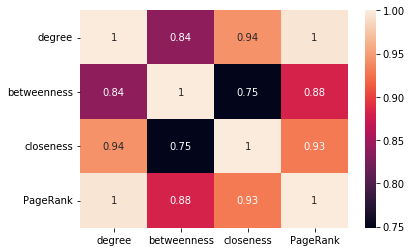

In [50]:
## Plotting correlation with Heatmap-

sns.heatmap(relations_data.corr(), annot = True)

#### Observations:

We can see that for the 6 most central characters-

    a. the largest correlation exists between 'degree' and 'PageRank' methods which is almost 1,
    
    b. the 2nd largest correlation exists between 'degree' and 'closeness' methods which is 0.94,
    
    c. the smallest correlation exists between 'betweenness' and 'closeness' methods which is 0.75.
    
Therefore, we can say the 'degree' method and the 'PageRank' method are the most similar in terms of correlation. And in terms of the central characters, we can also say the same.

### 3. Community detection, 12 points

In this exercise, you have to continue analysing the data
related to the Harry Potter series. You still need to work with the two above mentioned files.
Please not that the characters.csv file contains a large amount of missing values in some columns;
it is up to you to decide how to deal with this issue. After identifying the most central characters
in the previous task, now in order to gain more understanding of the network, you have to perform
several tasks:

• perform community detection analysis using the technique introduced in the course. Determine the optimal number of communities based on modularity, compare the resulting communities and attempt to characterize the difference between communities by focusing on the information in the characters.csv file.

• in the previous task you identified the 6 most important characters according to PageRank; now check how they relate to the resulting communities: are all of them in different communities (and each community is centered around one of those important characters) or are there some communities that include more than one of the 6 important characters.

In [51]:
### We will import a useful networkx subset focusing on communities- 

import networkx.algorithms.community as nx_comm

In [52]:
### Now we will create a 'generator object'- 

communities = nx_comm.girvan_newman(r_net) ## Using our previously created network  oject 'r_net'

communities

<generator object girvan_newman at 0x0000017841AD88C8>

In [53]:
### Converting the 'generator object into a list-

comm_list = list(communities)

comm_list

## This way we get one element for each step in running the community detection algrithm. So, the 1st element in the list
 # is the 02 subcommunities obtained when removing 01 edge. The 2nd element in the list is the 03 subcommunities obtained 
 # from the previous step when removing 01 edge and so on.

[({0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64},
  {17}),
 ({0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64},
  {17},
  {30}),
 ({0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
 

In [54]:
### Calculating the 'modularity' for each created community-

## ['modularity' is a useful measure to determine which community structure to use]

modularity_list = [] ## Creating an empty list

for comm in comm_list:
    mod = nx_comm.modularity(r_net, comm)
    modularity_list.append(mod)
    
    print('The modularity with', len(comm), 'subcommunities is:', mod)

The modularity with 2 subcommunities is: -4.509013518006661e-06
The modularity with 3 subcommunities is: -1.3527040554048812e-05
The modularity with 4 subcommunities is: -2.7054081108122184e-05
The modularity with 5 subcommunities is: -4.5090135180215814e-05
The modularity with 6 subcommunities is: 0.011696381065750475
The modularity with 7 subcommunities is: 0.017364211057904783
The modularity with 8 subcommunities is: 0.022540558576594625
The modularity with 9 subcommunities is: 0.030250971692413177
The modularity with 10 subcommunities is: 0.05652499346193048
The modularity with 11 subcommunities is: 0.056065074083092185
The modularity with 12 subcommunities is: 0.055334613893172555
The modularity with 13 subcommunities is: 0.05729152575999433
The modularity with 14 subcommunities is: 0.05617329040752473
The modularity with 15 subcommunities is: 0.05498291083876678
The modularity with 16 subcommunities is: 0.05372038705372044
The modularity with 17 subcommunities is: 0.0520295069844

0.05729152575999433


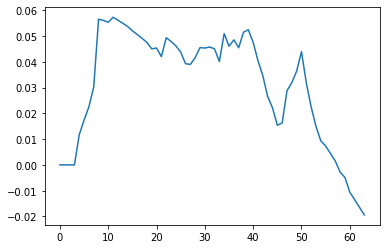

In [55]:
### Fetching the highest modularity with number of communities-

print(max(modularity_list)) ## To find the specific highest value

## We can also plot the values-

sns.lineplot(x = range(64), y = modularity_list)

## We can see that the highest modularity is associated with 13 subcommunities. Therefore separating the original network into this 13 subcommunities is the 
  # optimal way and this means the nodes in these 13 subcommunities are densely connected to each other.

In [56]:
### Separating the original network into this 13 subcommunities-

comm_13 = comm_list[11]

len(comm_13)

13

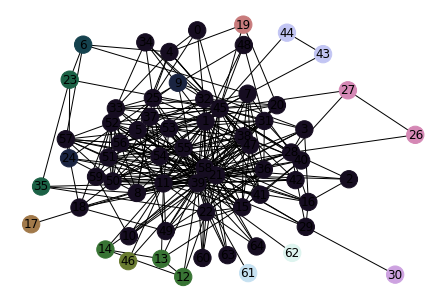

In [57]:
### Vizualizing the 13 subcommunities-

color_map_13 = []  ## Creating an empty list to store the colors

colors = sns.color_palette('cubehelix', 13)  ## Colors declaration

## Iterating over the nodes of the network and also the 13 possible subcommunities and getting the color-

for node in r_net:
    for i in range(len(comm_13)):
        if node in comm_13[i]:
            color_map_13.append(colors[i])

## Drawing the network-            
nx.draw_kamada_kawai(r_net, node_color = color_map_13, with_labels = True)

In [58]:
### Creating a list of membership labels-
 
## This has as many values as nodes in the network.

comm_member = []

for node in r_net:
    for i in range(len(comm_13)):
        if node in comm_13[i]:
            comm_member.append(i)

print(comm_member)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 5, 0, 4, 0, 0, 6, 0, 7, 0, 0, 0, 3, 1, 8, 8, 9, 10, 10, 11, 12]


In [59]:
### We will now insert this into our 'relations_data'

relations_data['member'] = comm_member

In [60]:
relations_data.sample(5)

,name,degree,betweenness,closeness,PageRank,member
39,Harry Potter,0.750000,0.281940,0.800000,0.069274,0
10,Alberforth Dumbledore,0.078125,0.000240,0.474074,0.008345,0
42,Quirinus Quirrell,0.062500,0.000000,0.503937,0.007104,0
38,Peter Pettigrew,0.234375,0.006586,0.556522,0.020209,0
52,Charlie Weasley,0.187500,0.000897,0.542373,0.016085,0


In [61]:
### Following we can have a look from multi dimentional agnle to the character dataset, 
# such as- numbers of data entries, null values (if any), datatypes.

df_characters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          65 non-null     object
 1   bio           65 non-null     object
 2   Gender        65 non-null     object
 3   Job           48 non-null     object
 4   House         45 non-null     object
 5   Wand          52 non-null     object
 6   Patronus      52 non-null     object
 7   Species       64 non-null     object
 8   Blood status  59 non-null     object
 9   Hair colour   56 non-null     object
 10  Eye colour    39 non-null     object
 11  Loyalty       41 non-null     object
 12  Skills        51 non-null     object
 13  Birth         58 non-null     object
 14  Death         22 non-null     object
dtypes: object(15)
memory usage: 10.6+ KB


In [62]:
### As we can see, this character dataset is full of many null values. We will try to somehow bypass those and focus on 
  # the columns with most relevant but with non-null values for the ease of our task. And in this case, we will go with 
  # 'Gender' and 'Species' columns.

## And now, we will insert these three columns into our previously modified 'relations_data'.

relations_data[['gender', 'species']] = df_characters[['Gender', 'Species']]

In [63]:
relations_data.sample(5)

,name,degree,betweenness,closeness,PageRank,member,gender,species
27,Frank Longbottom,0.046875,0.004227,0.435374,0.007377,8,Male,Human
29,Luna Lovegood,0.093750,0.031250,0.481203,0.011983,0,Female,Human
51,Bill Weasley,0.203125,0.001719,0.547009,0.017346,0,Male,Human (Werewolf traits)
36,Minerva McGonagall,0.171875,0.002458,0.537815,0.015533,0,Female,Human
3,Cho Chang,0.109375,0.001509,0.512000,0.011456,0,Female,Human


In [64]:
### We can then use 'groupby' function -

member_group = relations_data.groupby('member')

member_group['name'].count() ## to see the communitywise numbers of members

## Here, it is visible that among total 65 characters, 47 characters are in 01 subcommunity while rest 18 characters are 
 # spreaded in other 12 subcommunities.

member
0     47
1      2
2      1
3      2
4      3
5      1
6      1
7      1
8      2
9      1
10     2
11     1
12     1
Name: name, dtype: int64

In [65]:
member_group['gender'].value_counts()

member  gender
0       Male      34
        Female    13
1       Male       2
2       Male       1
3       Female     1
        Male       1
4       Male       2
        Female     1
5       Female     1
6       Male       1
7       Male       1
8       Female     1
        Male       1
9       Male       1
10      Female     1
        Male       1
11      Female     1
12      Female     1
Name: gender, dtype: int64

In [66]:
member_group['species'].value_counts()

member  species                
0       Human                      39
        Animal                      2
        Half-Human/Half-Giant       1
        House elf                   1
        Human                       1
        Human (Metamorphmagus)      1
        Human (Werewolf traits)     1
1       Human                       1
        Human                       1
2       Human                       1
3       Half-Human/Half-Giant       1
        Human                       1
4       Human                       3
5       Human                       1
6       Human                       1
7       Human                       1
8       Human                       2
9       Human                       1
10      Human                       2
11      Animal                      1
12      Ghost                       1
Name: species, dtype: int64

In [67]:
### Most 06 central characters based on 'PageRank'-

top6_char_PR = relations_data.sort_values(by = 'PageRank', ascending = False)[:6]
top6_char_PR

,name,degree,betweenness,closeness,PageRank,member,gender,species
39,Harry Potter,0.750000,0.281940,0.800000,0.069274,0,Male,Human
45,Lord Voldemort,0.562500,0.203448,0.688172,0.052080,0,Male,Human
58,Ron Weasley,0.578125,0.098503,0.703297,0.049293,0,Male,Human
21,Hermione Granger,0.562500,0.093993,0.695652,0.048832,0,Female,Human
11,Albus Dumbledore,0.500000,0.100495,0.653061,0.044680,0,Male,Human
1,Sirius Black,0.359375,0.027876,0.592593,0.030296,0,Male,Human


#### Observations:-

We can see that all important 06 characters are in the same community. We can also see that these all are Human and of which 05 are males while rest 01 is female.